In [1]:
install.packages("e1071")

Installing package into ‘/usr/local/lib/R/4.0/site-library’
(as ‘lib’ is unspecified)



In [7]:
library(e1071)

In [2]:
# separate data for train and test

get_train_test <- function(data, persentage) {
    size = dim(data)[1]
    set.seed(12345)
    randomized = data[order(runif(size)), ]
    train_sep = as.integer(size * 0.008 * persentage)
    test_sep = as.integer(size * (80 / 100))
    list(randomized[1 : train_sep, ], randomized[(test_sep + 1) : size, ])
}

# get predictions

get_predictions = function(target_col, data) {
    get_data_list = lapply(seq(10, 100, by = 10), function(persentage) { get_train_test(data, persentage) })
    
    iteration = function(separated_data) {
        train = separated_data[[1]]
        test = separated_data[[2]]
        size_of_test = dim(test)[1]
        
        classifier = naiveBayes(as.formula(paste(target_col, '~ .')), train)
        predicted = predict(classifier, test)
        
        result = table(predicted, test[[target_col]])
        (result[[1]] + result[[4]]) / size_of_test  
    }
    
    sapply(get_data_list, iteration)
}

# tic tac toe

In [3]:
#read data from file
data = read.table("Tic_tac_toe.txt", sep = ",", stringsAsFactors = TRUE)
head(data)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,x,x,x,x,o,o,x,o,o,positive
2,x,x,x,x,o,o,o,x,o,positive
3,x,x,x,x,o,o,o,o,x,positive
4,x,x,x,x,o,o,o,b,b,positive
5,x,x,x,x,o,o,b,o,b,positive
6,x,x,x,x,o,o,b,b,o,positive


In [4]:
accuracy = get_predictions('V10', data)

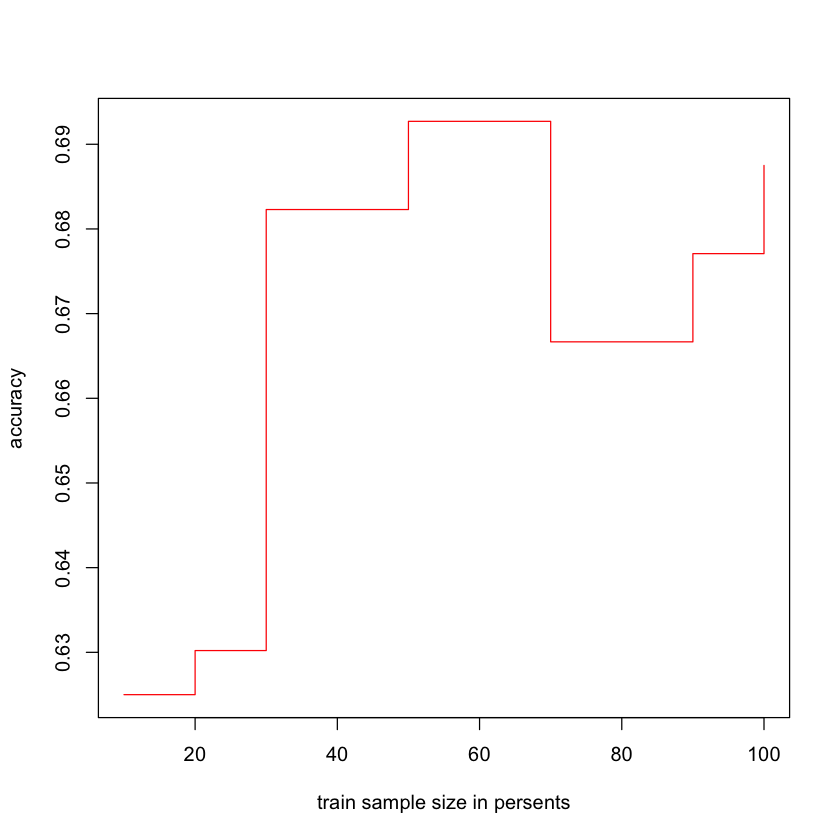

In [5]:
plot(seq(10, 100, by = 10), accuracy, type = 's', xlab = 'train sample size in persents', ylab = 'accuracy', col = 'red')

# email spam

In [6]:
library('kernlab')

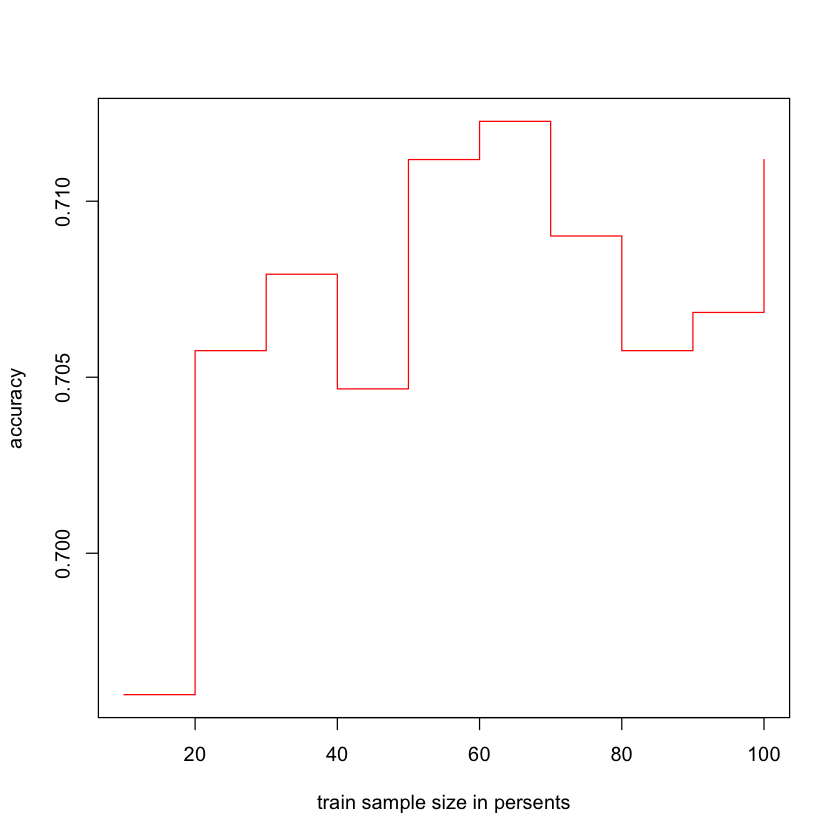

In [7]:
data(spam)
accuracy = get_predictions('type', spam)
plot(seq(10, 100, by = 10), accuracy, type = 's', xlab = 'train sample size in persents', ylab = 'accuracy', col = 'red')

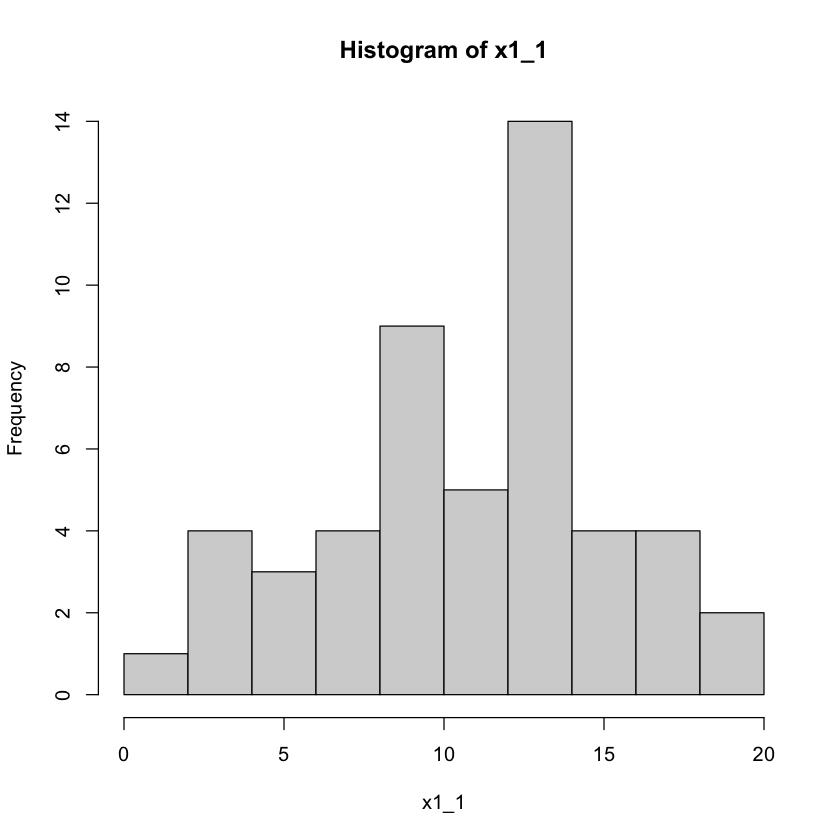

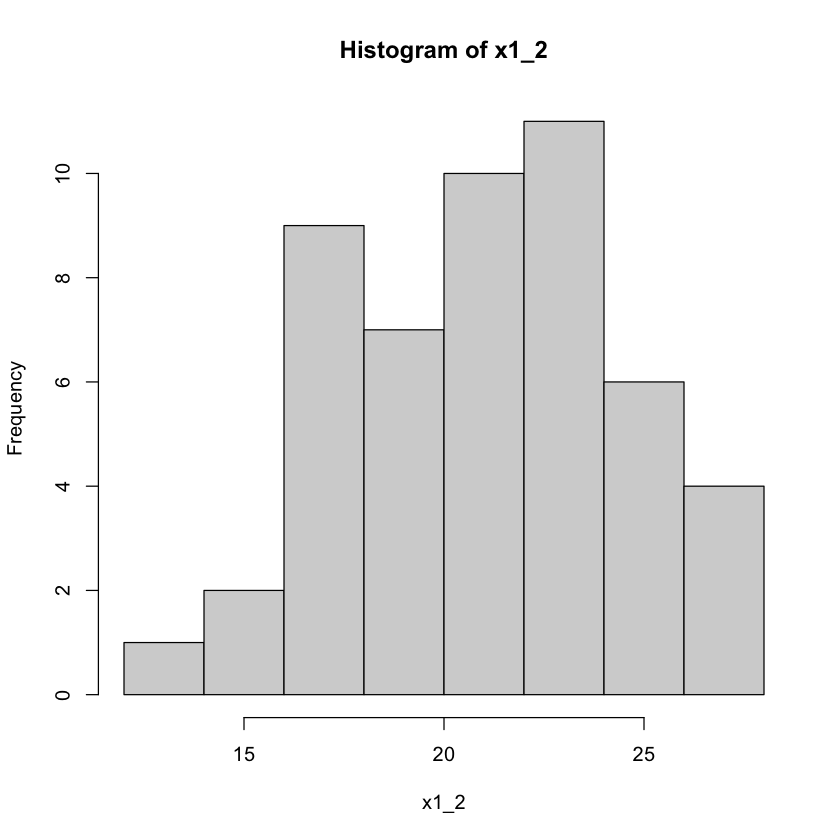

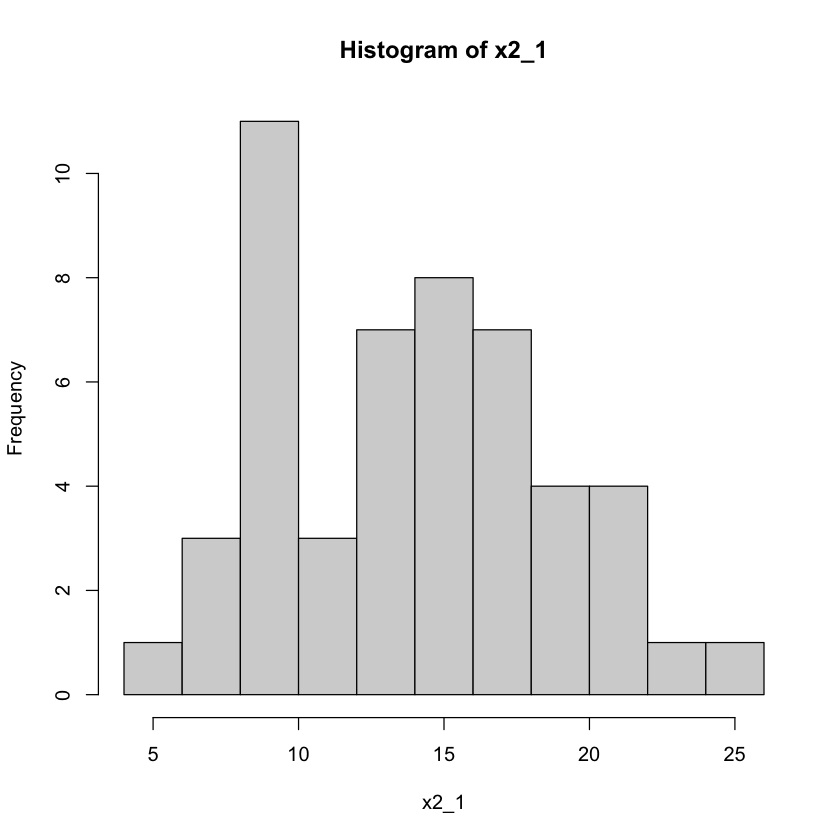

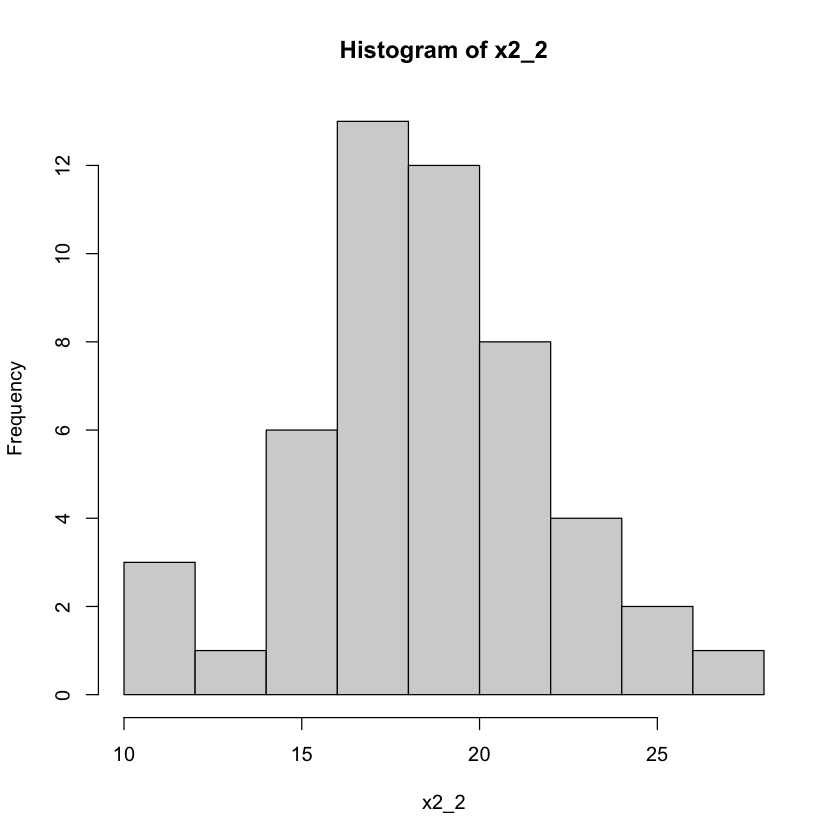

In [3]:
# generate normally distrebuted data

x1_1 = rnorm(50, mean = 10, sd = 4)
x1_2 = rnorm(50, mean = 20, sd = 3)
x2_1 = rnorm(50, mean = 14, sd = 4)
x2_2 = rnorm(50, mean = 18, sd = 4)

# plot them

hist(x1_1)
hist(x1_2)
hist(x2_1)
hist(x2_2)

# 

data<-data.frame(x1=c(x1_1, x1_2), x2=c(x2_1, x2_2), target=c(rep('0',50),rep('1',50)), stringsAsFactors = TRUE)

In [4]:
accuracy = get_predictions('target', data)
plot(seq(10, 100, by = 10), accuracy, type = 's', xlab = 'train sample size in persents', ylab = 'accuracy', col = 'red')

ERROR: Error in get_predictions("target", data): не могу найти функцию "get_predictions"


In [11]:
#separate data for train and test
get_train_test <- function(data, persentage) {
    size = dim(data)[1]
    set.seed(12345)
    randomized = data[order(runif(size)), ]
    train_sep = as.integer(size * persentage / 100)
    test_sep = as.integer(size * (1 - persentage / 100))
    list(randomized[1 : train_sep, ], randomized[(test_sep + 1) : size, ])
}

#test the function
separated_data = get_train_test(data, 80)
train = separated_data[[1]]
test = separated_data[[2]]
size_of_test = dim(test)[1]

classifier = naiveBayes(as.formula(paste('target', '~ .')), train)
predicted = predict(classifier, test)
        
result = table(predicted, test[['target']])
    (result[[1]] + result[[4]]) / size_of_test
print(result)

[1] 0.9259259

         
predicted  0  1
        0 38  3
        1  3 37


# titanic

In [11]:
train = read.csv("titanic/train.csv", na.strings = c('NA', ''))
test = read.csv("titanic/test.csv", na.strings = c('NA', ''))

In [12]:
train = subset(train, select = -c(PassengerId, Name, Cabin, Embarked, Fare, SibSp, Parch, Ticket))
PassengerId = test$PassengerId
test = subset(test, select = -c(PassengerId, Name, Cabin, Embarked, Fare, SibSp, Parch, Ticket))

In [13]:
update_age <- function(data) {
    median_table = data.frame(male=c(0, 0, 0), female=c(0, 0, 0))
    median_table[1, 'male'] = median(as.numeric(subset(data, Sex=='male' & Pclass==1 & !is.na(Age))$Age))
    median_table[2, 'male'] = median(as.numeric(subset(data, Sex=='male' & Pclass==2 & !is.na(Age))$Age))
    median_table[3, 'male'] = median(as.numeric(subset(data, Sex=='male' & Pclass==3 & !is.na(Age))$Age))
    median_table[1, 'female'] = median(as.numeric(subset(data, Sex=='female' & Pclass==1 & !is.na(Age))$Age))
    median_table[2, 'female'] = median(as.numeric(subset(data, Sex=='female' & Pclass==2 & !is.na(Age))$Age))
    median_table[3, 'female'] = median(as.numeric(subset(data, Sex=='female' & Pclass==3 & !is.na(Age))$Age))
    
    data$Age = apply(data, 1, function(row) {
        new_age = 0

        if (is.na(row['Age'])) {
            new_age = median_table[row['Pclass'], row['Sex']]
        } else {
            new_age = row['Age']
        }
        
        new_age
    })
    
    data$Age = as.numeric(data$Age)
    data
}

train = update_age(train)
test = update_age(test)

In [15]:
classifier = naiveBayes(as.factor(Survived)~., train)
predicted = predict(classifier, test)
Survived = as.numeric(predicted) - 1
result = data.frame(PassengerId=PassengerId, Survived=Survived)

In [16]:
write.csv(result,'submission.csv', row.names=FALSE)

# kaggle score - 0.76076